# Sales and Customer Analytics for a Retail Store

## Objective:

To analyze sales data from a retail company to understand sales trends, customer behavior, and product performance. The goal is to derive insights that can improve marketing strategies, stock management, and profitability.



> Import the packages 

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

> Load data

In [29]:
df = pd.read_csv(r'Superstore.csv.csv',encoding='ISO-8859-1')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


> Basic overview

In [32]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

> Check for missing values

In [35]:
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


> Droping irrelevant columns 

In [38]:
df.drop(['Postal Code'], axis=1, inplace=True)

### Sales over Time

<Axes: title={'center': 'Sales Over Time'}, xlabel='Order Date'>

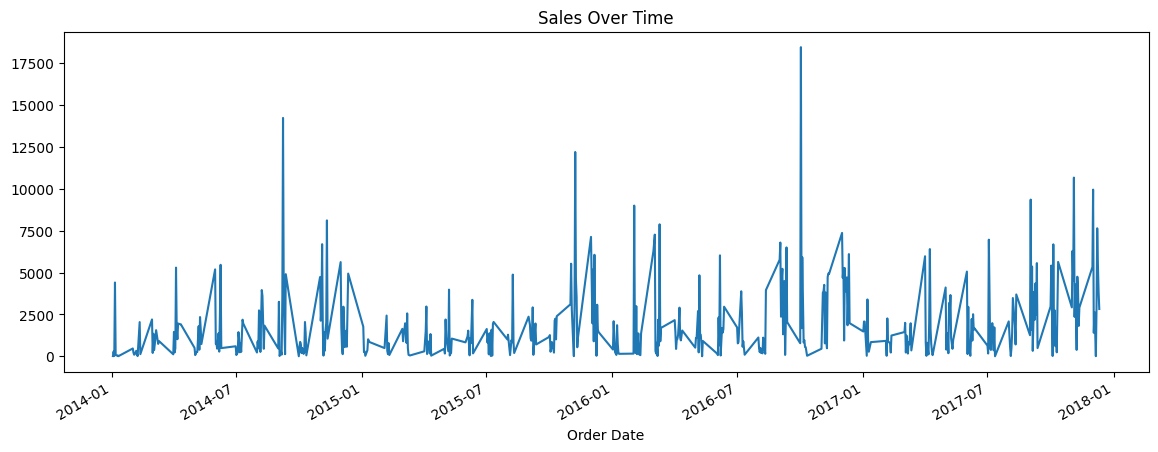

In [56]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
sales_by_date = df.groupby('Order Date')['Sales'].sum()
sales_by_date.plot(figsize=(14,5), title="Sales Over Time")


###  Sales by Category and Sub-Category

Text(0.5, 1.0, 'Total Sales by Category')

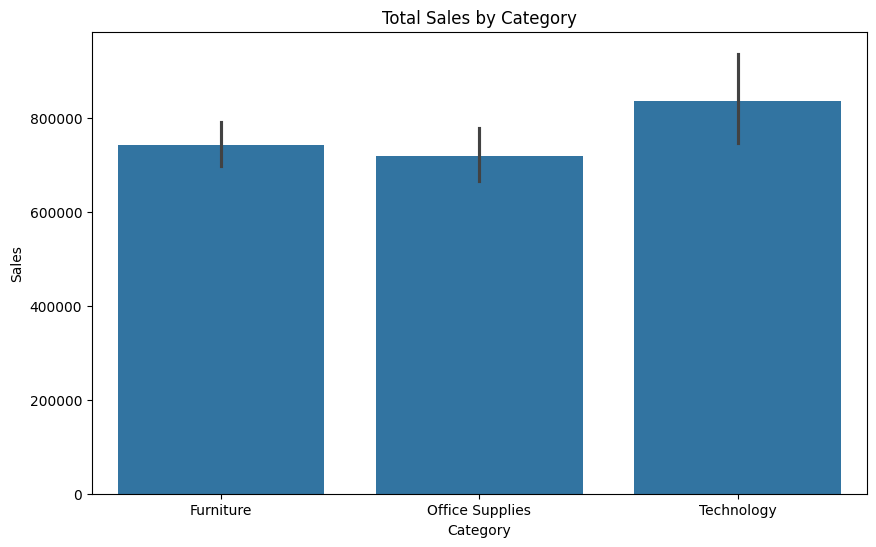

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Category', y='Sales', estimator=sum)
plt.title("Total Sales by Category")

Text(0.5, 1.0, 'Total Sales by Sub-Category')

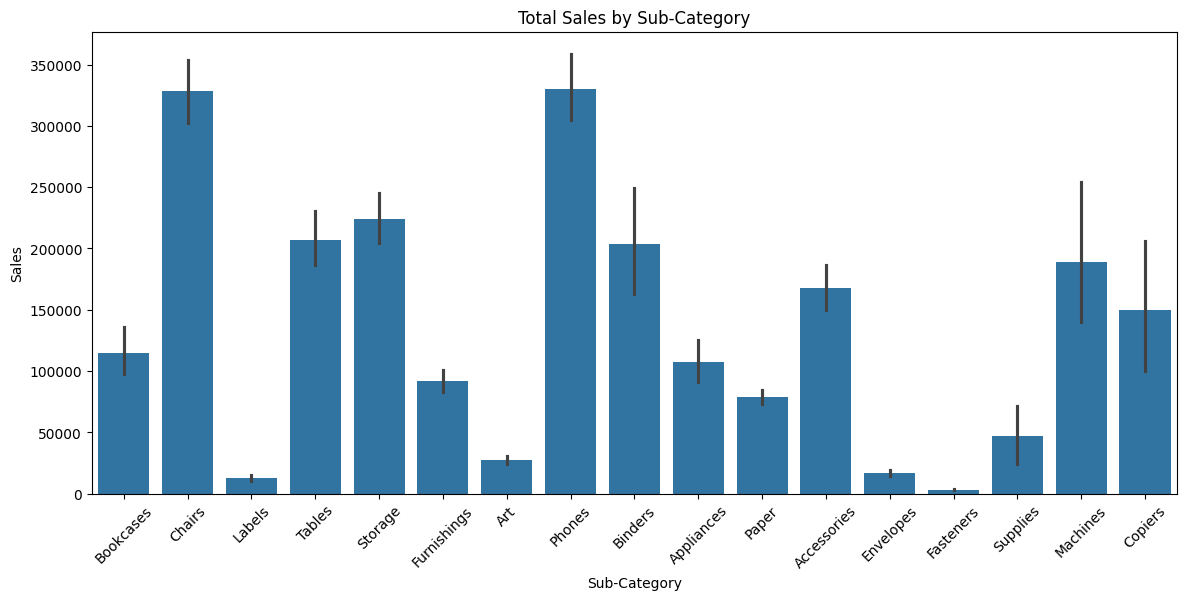

In [46]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='Sub-Category', y='Sales', estimator=sum)
plt.xticks(rotation=45)
plt.title("Total Sales by Sub-Category")


###  Region-wise Performance

<Axes: title={'center': 'Sales & Profit by Region'}, xlabel='Region'>

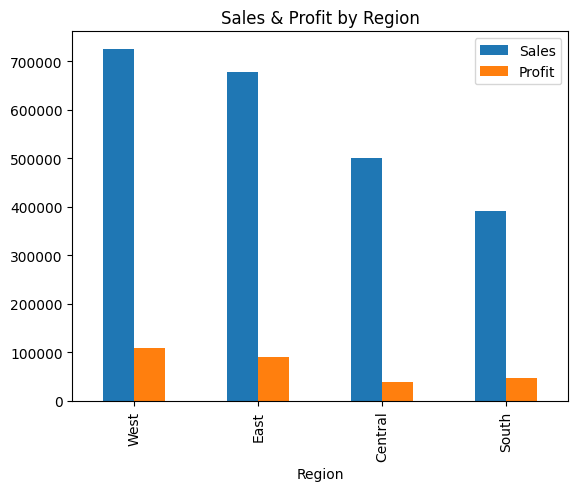

In [49]:
region_perf = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
region_perf.plot(kind='bar', title="Sales & Profit by Region")

### Discount vs Profit

Text(0.5, 1.0, 'Discount vs Profit')

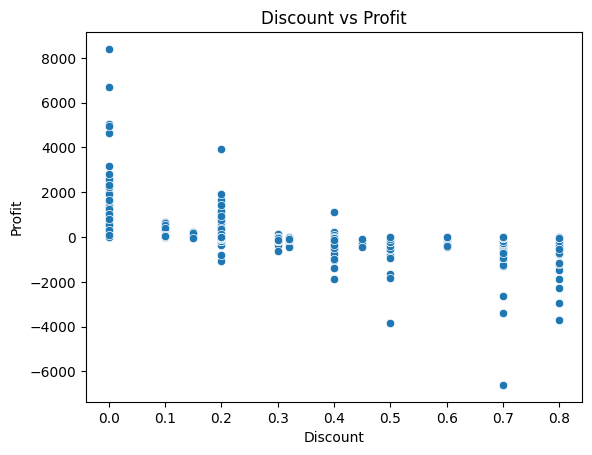

In [52]:
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title("Discount vs Profit")

## Business Insights

- Top Categories: Technology generates the most revenue, but Office Supplies yield more consistent profits.

- Loss-Making Discounts: High discounts (above 20%) significantly reduce profits.

- Profitable Regions: The West region has both high sales and high profits; focus marketing here.

- Low-Performing Sub-Categories: Tables in the Furniture category have high sales but lead to losses.

- Customer Segments: Corporate customers are highly profitable and should be prioritized.

